# ** Titanic Dataset **

### Using machine learning to create a model that predicts which passengers survived the Titanic shipwreck. 


(Basic EDA and Logistic Regression)

In [1]:
#loading all necessary modules
import sys
import os

import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from IPython.display import display


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#load and read both train and test datasets
train= pd.read_csv("train.csv")
test= pd.read_csv("test.csv")

train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## EDA

### Analysing the dataset and its features

In [3]:
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
#identifying test columns having missing values and data inconsistencies
print(train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:
#imputing missing values in the 'Embarked' column with the mode, because less than 1% data is missing.
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])
print(train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [8]:
#identifying columns having missing values and data inconsistencies
print(test.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [9]:
#drop unnecessary columns from train and test set.
dum_df = pd.get_dummies(train['Sex'])
train1= train.join(dum_df)
df = train1.drop(['Name','Sex','Ticket','Cabin','male','SibSp','Fare'],axis=1)

dum_df_test = pd.get_dummies(test['Sex'])
test1= test.join(dum_df_test)
df_test = test1.drop(['Name','Sex','Ticket','Cabin','male','SibSp','Fare'],axis=1)
df.head(10)

,PassengerId,Survived,Pclass,Age,Parch,Embarked,female
0,1,0,3,22.0,0,S,0
1,2,1,1,38.0,0,C,1
2,3,1,3,26.0,0,S,1
3,4,1,1,35.0,0,S,1
4,5,0,3,35.0,0,S,0
5,6,0,3,NaN,0,Q,0
6,7,0,1,54.0,0,S,0
7,8,0,3,2.0,1,S,0
8,9,1,3,27.0,2,S,1
9,10,1,2,14.0,0,C,1


In [10]:
df_test.head(10)

,PassengerId,Pclass,Age,Parch,Embarked,female
0,892,3,34.5,0,Q,0
1,893,3,47.0,0,S,1
2,894,2,62.0,0,Q,0
3,895,3,27.0,0,S,0
4,896,3,22.0,1,S,1
5,897,3,14.0,0,S,0
6,898,3,30.0,0,Q,1
7,899,2,26.0,1,S,0
8,900,3,18.0,0,C,1
9,901,3,21.0,0,S,0


### Plotting heatmap to analyse cleaned dataset

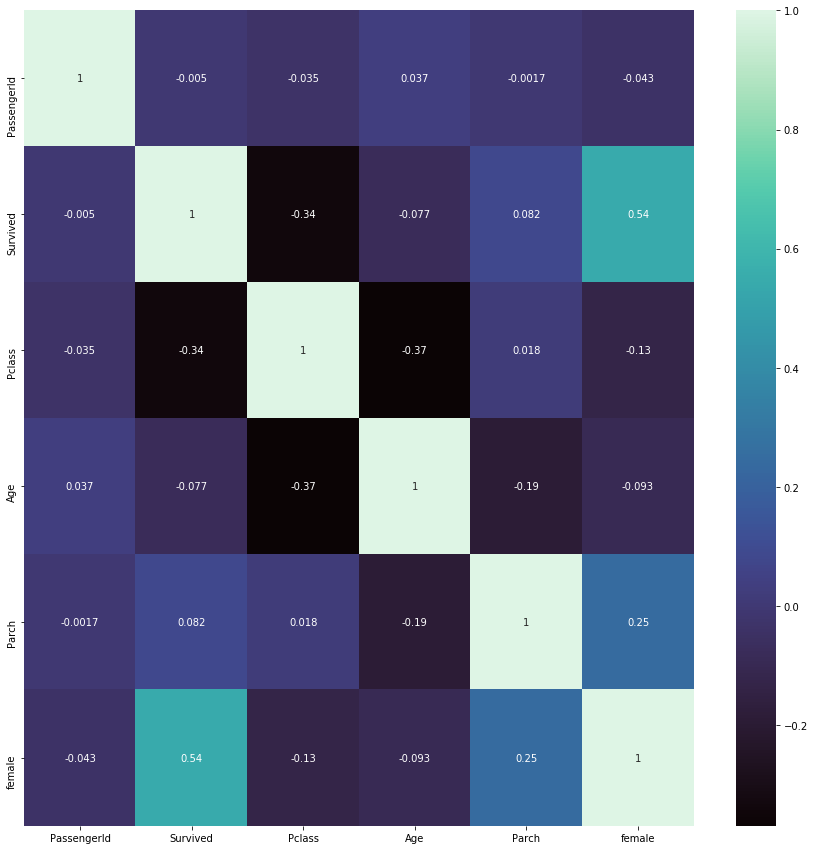

In [11]:
#identifying correlated features
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), cmap= "mako", annot=True)

In [12]:
#categorise the Age column to remove continuity
df["Age"] = df["Age"].map(lambda x: x - (x%10))

df_test["Age"] = df_test["Age"].map(lambda x: x - (x%10))
df.Age.unique()

array([20., 30., nan, 50.,  0., 10., 40., 60., 70., 80.])

In [13]:
df.head(10)

,PassengerId,Survived,Pclass,Age,Parch,Embarked,female
0,1,0,3,20.0,0,S,0
1,2,1,1,30.0,0,C,1
2,3,1,3,20.0,0,S,1
3,4,1,1,30.0,0,S,1
4,5,0,3,30.0,0,S,0
5,6,0,3,NaN,0,Q,0
6,7,0,1,50.0,0,S,0
7,8,0,3,0.0,1,S,0
8,9,1,3,20.0,2,S,1
9,10,1,2,10.0,0,C,1


### Encoding categorical data

In [14]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df['Age'] = labelencoder.fit_transform(df['Age'])
df['Embarked'] = labelencoder.fit_transform(df['Embarked'])

df_test['Age'] = labelencoder.fit_transform(df_test['Age'])
df_test['Embarked'] = labelencoder.fit_transform(df_test['Embarked'])
df.head(10)

,PassengerId,Survived,Pclass,Age,Parch,Embarked,female
0,1,0,3,2,0,2,0
1,2,1,1,3,0,0,1
2,3,1,3,2,0,2,1
3,4,1,1,3,0,2,1
4,5,0,3,3,0,2,0
5,6,0,3,9,0,1,0
6,7,0,1,5,0,2,0
7,8,0,3,0,1,2,0
8,9,1,3,2,2,2,1
9,10,1,2,1,0,0,1


In [15]:
df_test.head(10)

,PassengerId,Pclass,Age,Parch,Embarked,female
0,892,3,3,0,1,0
1,893,3,4,0,2,1
2,894,2,6,0,1,0
3,895,3,2,0,2,0
4,896,3,2,1,2,1
5,897,3,1,0,2,0
6,898,3,3,0,1,1
7,899,2,2,1,2,0
8,900,3,1,0,0,1
9,901,3,2,0,2,0


In [16]:
df.Age.unique()

array([2, 3, 9, 5, 0, 1, 4, 6, 7, 8], dtype=int64)

### Imputing missing values using KNN Imputer

In [17]:
from sklearn.impute import KNNImputer
impute_knn = KNNImputer(n_neighbors=(len(df.Age.unique())-1))
df["Age"] = impute_knn.fit_transform(df["Age"].reshape(-1,1))

impute_knn = KNNImputer(n_neighbors=(len(df_test.Age.unique())-1))
df_test["Age"] = impute_knn.fit_transform(df_test["Age"].reshape(-1,1))

In [18]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
Parch          0
Embarked       0
female         0
dtype: int64

## Modelling the data

### Using logistic regression model for classification

In [19]:
#split train data into train and validation set to cross check the accuracy of the model
from sklearn.model_selection import train_test_split
y = df.loc[:,'Survived']
x = df.drop(['Survived'], axis=1)
x_train, x_val, y_train, y_val= train_test_split(x,y, train_size=0.8)
train_id = x_train.loc[:,'PassengerId']
val_id = x_val.loc[:,'PassengerId']
x_train = x_train.drop(['PassengerId'], axis=1)
x_val = x_val.drop(['PassengerId'], axis=1)

In [20]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_val)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0], dtype=int64)

In [21]:
from sklearn import metrics

#plot confusion matrix
cnf_matrix = metrics.confusion_matrix(y_val, y_pred)

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="mako" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

array([[89, 26],
       [22, 42]], dtype=int64)

In [23]:
#analyse all test metrics
from sklearn.metrics import classification_report
target_names = ['didnot survive', 'survived']
print(classification_report(y_val, y_pred, target_names=target_names))

                precision    recall  f1-score   support

didnot survive       0.80      0.77      0.79       115
      survived       0.62      0.66      0.64        64

      accuracy                           0.73       179
     macro avg       0.71      0.72      0.71       179
  weighted avg       0.74      0.73      0.73       179



In [26]:
test_id = df_test.loc[:,'PassengerId']
x_test = df_test.drop(['PassengerId'], axis=1)
y_final= logreg.predict(x_test)

### Create final dataset with predicted labels.

In [29]:
data = {'PassengerId':test_id.tolist(), 'Survived':y_final}
 
# Create DataFrame
df_final = pd.DataFrame(data)
 
# Print the output.
df_final.head(20)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [31]:
df_final.to_csv('submission.csv', index= False)